## Importing Libraries

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Loading Model

In [3]:
model  = tf.keras.models.load_model('trained_model.keras')

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

### Visualizaing Single Image of Test set

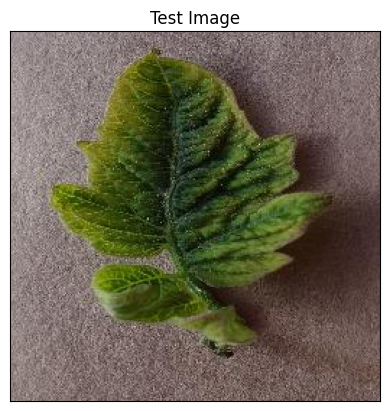

In [5]:
import cv2
import matplotlib.pyplot as plt

image_path = r"test\test\TomatoYellowCurlVirus1.JPG"

# Reading image
img = cv2.imread(image_path)
if img is None:
    raise FileNotFoundError(f"Image not found at {image_path}")

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR image to RGB

# Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])  # Fixed `ylabel([])` -> `yticks([])`
plt.show()


## Testing Model

In [6]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #Convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [7]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 44s 44s/step


(array([[3.1412000e-07, 7.2286127e-08, 1.4567188e-05, 6.9431439e-07,
         4.8368724e-07, 8.4081667e-06, 2.9165760e-08, 3.0004824e-07,
         3.6389675e-10, 2.5022126e-07, 1.2285891e-08, 2.0096652e-06,
         5.5914478e-07, 2.6679708e-04, 1.3100114e-07, 6.7671208e-06,
         8.6445010e-07, 6.0653477e-08, 1.9772173e-05, 5.3868513e-07,
         2.6601809e-08, 6.5840148e-05, 1.5452712e-06, 1.4108990e-03,
         1.4630779e-06, 3.6901009e-05, 1.3824030e-03, 7.1389950e-06,
         6.1941380e-04, 1.0505765e-02, 3.3588065e-06, 5.6583913e-06,
         1.0873570e-05, 6.8104337e-03, 3.2156962e-04, 9.7753477e-01,
         9.4916252e-04, 9.9524696e-06]], dtype=float32),
 (1, 38))

In [8]:
result_index = np.argmax(prediction)
result_index

35

In [9]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

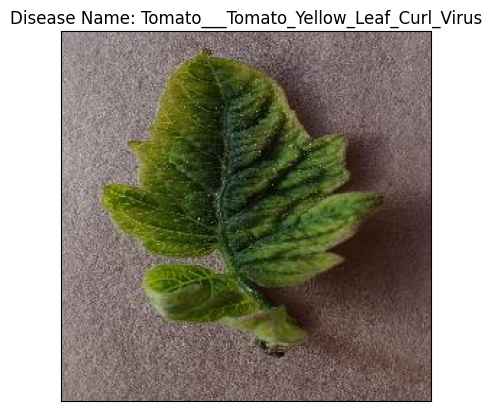

In [10]:
#Displaying Result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [11]:
model_prediction

'Tomato___Tomato_Yellow_Leaf_Curl_Virus'